## Real Estate -Price Predicator

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("BostonHousing.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline  

In [8]:
#For plotting histrogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train-Test Spitting

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]  # 80-20 ratio
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing,0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['chas'].value_counts()

chas
0    376
1     28
Name: count, dtype: int64

In [16]:
housing =strat_train_set.copy()

# Looking for Correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679894
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

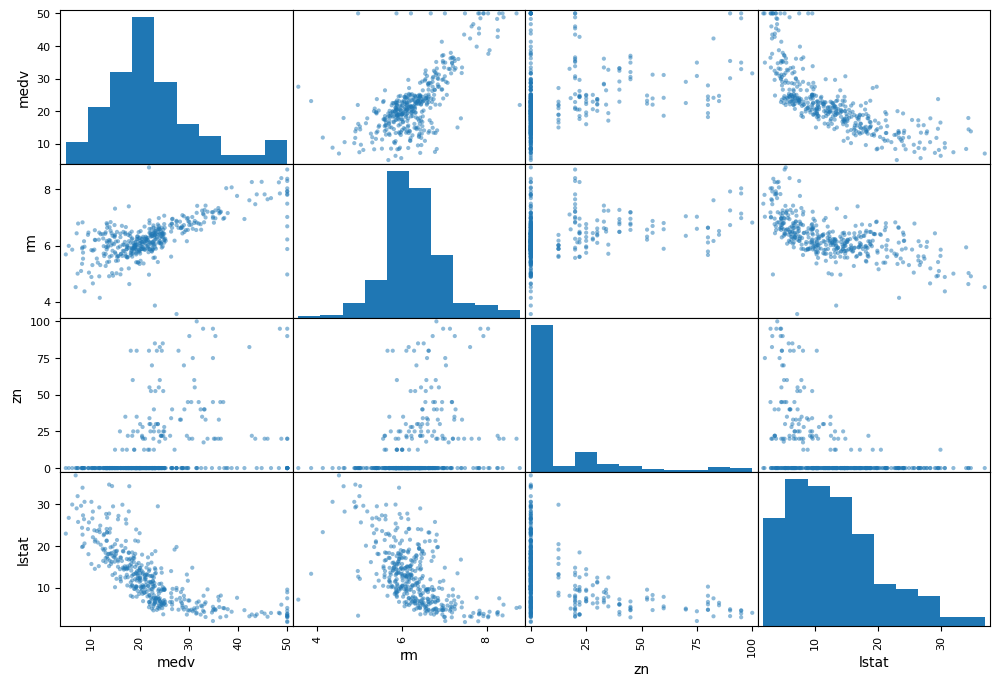

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["medv","rm","zn","lstat"]
scatter_matrix(housing[attributes],figsize =(12,8))

<Axes: xlabel='rm', ylabel='medv'>

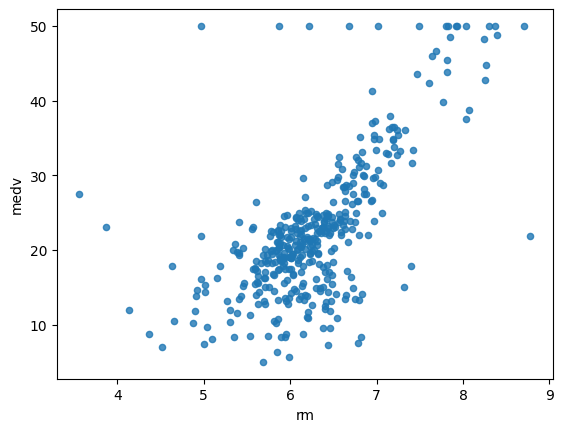

In [19]:
housing.plot(kind="scatter",x = "rm",y="medv",alpha=0.8)

## Trying out attribute combination

In [20]:
housing["taxrm"] = housing['tax']/housing['rm'] 

In [21]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679894
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.525160
lstat     -0.740494
Name: medv, dtype: float64

<Axes: xlabel='taxrm', ylabel='medv'>

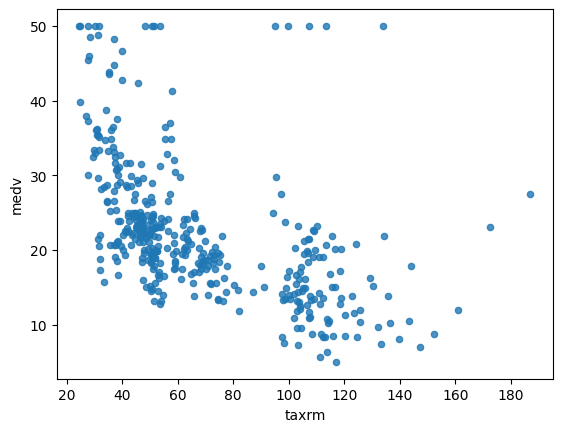

In [23]:
housing.plot(kind="scatter",x="taxrm",y="medv",alpha =0.8)

In [24]:
housing = strat_train_set.drop("medv",axis =1)
housing_labels =strat_train_set["medv"].copy()

## Missing Attributes

In [25]:
# To take care missing attributes we can use the following ideas:
#     1. Get rid of the missing data points
#     2.Get rid of the whole attribute
#     3.Set the value to some value(0.mean or median)

In [26]:
a=housing.dropna(subset=["rm"]) #option 1
a.shape

(404, 13)

In [27]:
housing.drop("rm",axis=1).shape #option 2
#Note: there is no rm column now and original housing dataframe is unchanged

(404, 12)

In [28]:
median = housing["rm"].median()  #compute median for option 3

In [29]:
housing["rm"].fillna(median)   #option 3
# Note:original housing dataframe is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
housing.describe() #before we started imputing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X,columns = housing.columns)

In [36]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg:imputer.
               - It has a fit method and tranform method.
               - Fit method- Fits the dataset and calcualte internal parameter.

2. Transformers - Takes input and returns output based on learning from fit().It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor.fit() and predict() are two common functions.It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily,two types of feature scaling methods:
1. Min-max scaling (Normalization):
    (value-min)/(max-min).
    Sklearn provides a class called MinMaxScaler for this.
2. Standardization:
    (value-mean)/std.
    Sklearn provides a class called standard scaler for this  (Better bcz if 2-3 values are wrong than also it would not effect the values).

## Creating a pipline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),('std_scaler',StandardScaler(),)  # we can add more values
])


In [38]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr.shape  #this is a numpy array

(404, 13)

## Selecting a desired model for Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

#We are not taking taxrm attribute

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.282, 25.404, 16.567, 23.353, 23.668])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predications = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predications)
lin_rmse = np.sqrt(lin_mse)

In [47]:
lin_mse     ##overfitting may happen

1.3833431608910873

In [48]:
lin_rmse

1.1761560954614347

## Using better evaluation technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([2.79157568, 2.77005483, 4.35879691, 2.42323655, 3.36237859,
       2.77063336, 4.75473624, 3.42625698, 2.97399311, 3.55280232])

In [51]:
def print_scores(scores):
    print("Scores:" ,scores)
    print("Mean: ",scores.mean())
    print("Standered devaition: ", scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [2.79157568 2.77005483 4.35879691 2.42323655 3.36237859 2.77063336
 4.75473624 3.42625698 2.97399311 3.55280232]
Mean:  3.3184464578637702
Standered devaition:  0.7079694556927096


## Saving the model

In [53]:
from joblib import dump,load
dump(model,'Estates.joblib')

['Estates.joblib']

## Testng the model on test data

In [55]:
X_test = strat_test_set.drop('medv', axis=1)
Y_test = strat_test_set['medv'].copy()  # Corrected .copy() method
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)  # Corrected variable name
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list[Y_test])

[24.491 11.496 26.142 21.741 18.059 14.97  19.959 14.749 32.246 41.592
 19.211 12.341 23.584 30.517 19.891 11.531 32.092 14.686 23.734 18.239
 19.901 18.105 18.485 22.266 18.61  31.953 15.901 32.917  8.747 33.619
 22.977 21.578 22.537 11.183 21.017 11.155 43.252 24.627 23.509 40.91
 24.135 30.766 20.618 20.837 19.371 33.516 45.077 20.143 20.507 22.081
 21.737 14.898 21.722 15.028 25.168 33.467 42.182 29.088 19.844 20.626
 46.58   9.973 19.036 26.089 14.559 33.073 19.7   17.86  19.005 34.01
 24.407 22.665 21.511 22.462 34.161 12.643 15.473 20.303 20.566 21.512
 22.182 20.784 13.848 22.732 20.498 21.239 13.42  21.409 21.44  23.084
 18.841 26.692  7.294 26.575 18.745 29.393 19.367 31.143 14.945 26.556
 20.993 20.322] list[342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: medv, Length: 102, dtype: float64]


In [56]:
final_rmse

2.937741043927538

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [58]:
from joblib import dump ,load
import numpy as np
model = load('Estates.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.282])